In [1]:
import zipfile
with zipfile.ZipFile('c:/work/data/mnist/dataset.zip') as zip_ref:
    zip_ref.extractall('c:/work/data/mnist/')

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, data_home='c:/work/data/mnist', as_frame=False)
mnist.data[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
import numpy as np
X, y = mnist['data'], mnist['target']
y = y.astype(np.int64)
print(X.shape, y.shape)

(70000, 784) (70000,)


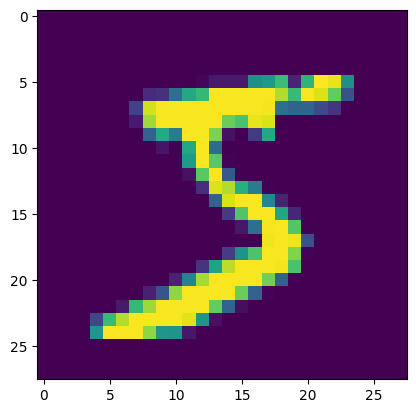

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X[0].reshape(28,28))
plt.show()

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [6]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [7]:
from scipy.ndimage import shift

def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx])
    return shifted_image.reshape([-1])

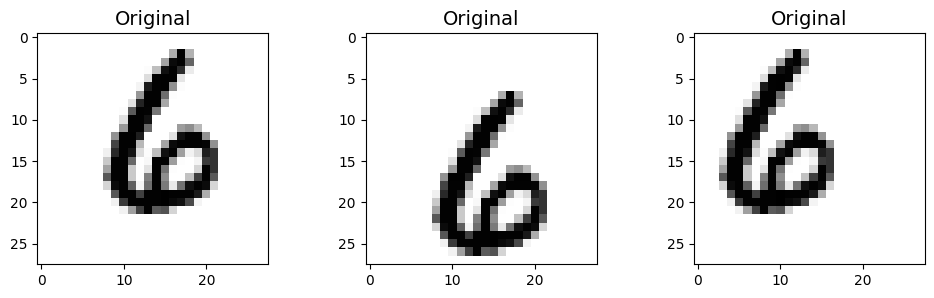

In [9]:
import matplotlib.pyplot as plt

image = X_train[70]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title('Original', fontsize=14)
plt.imshow(image.reshape(28,28), cmap='Greys')

plt.subplot(132)
plt.title('Original', fontsize=14)
plt.imshow(shifted_image_down.reshape(28,28), cmap='Greys')

plt.subplot(133)
plt.title('Original', fontsize=14)
plt.imshow(shifted_image_left.reshape(28,28), cmap='Greys')

plt.show()

In [12]:
#오래 걸림
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

#원본 이미지 6만개 + 쉬프트 이미지 24만개 => 30만개로 증식됨
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [13]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [15]:
y_train_augmented

array([2, 9, 1, ..., 7, 3, 2], dtype=int64)

In [16]:
# 오래걸림
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(X_train_augmented[:1000], y_train_augmented[:1000])

KNeighborsClassifier(n_neighbors=1)

In [17]:
from sklearn.metrics import accuracy_score

y_pred = knn_clf.predict(X_test[:1000])
accuracy_score(y_test[:1000], y_pred[:1000])

0.826